# Colon Cancer Drug Response Prediction

In [3]:
import pandas as pd

In [4]:
file_path = "raw_colon_cancer_data.csv"
df = pd.read_csv(file_path)
df.shape

(7643, 82)

In [5]:
df.head()

,Patient_ID,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,...,Pathway_2,Pathway_3,Pathway_4,Pathway_5,Drug_Response,Resistance_Mechanisms,Metabolism_Pathway,Toxicity_Risk,Survival_Outcome,Treatment_Dosage
0,Patient_1,3.745401,9.507143,7.319939,5.986585,1.560186,1.559945,0.580836,8.661761,6.011150,...,High,Moderate,Moderate,Low,9.440715,1,Slow,2,61.397774,1.406563
1,Patient_2,9.695846,7.751328,9.394989,8.948274,5.979000,9.218742,0.884925,1.959829,0.452273,...,Low,High,High,Low,8.917807,1,Slow,1,73.403613,1.747822
2,Patient_3,0.314292,6.364104,3.143560,5.085707,9.075665,2.492922,4.103829,7.555511,2.287982,...,Low,High,Low,Low,9.062609,1,Fast,0,32.380910,4.145579
3,Patient_4,9.082659,2.395619,1.448949,4.894528,9.856505,2.420553,6.721355,7.616196,2.376375,...,Moderate,High,Low,High,9.030050,1,Normal,2,15.973868,1.153012
4,Patient_5,6.420316,0.841400,1.616287,8.985542,6.064291,0.091971,1.014715,6.635018,0.050616,...,Low,High,Moderate,High,8.750172,1,Slow,0,70.589234,2.438964


## Data preparation

In [6]:
print(df.columns)

Index(['Patient_ID', 'Gene_1', 'Gene_2', 'Gene_3', 'Gene_4', 'Gene_5',
       'Gene_6', 'Gene_7', 'Gene_8', 'Gene_9', 'Gene_10', 'Gene_11', 'Gene_12',
       'Gene_13', 'Gene_14', 'Gene_15', 'Gene_16', 'Gene_17', 'Gene_18',
       'Gene_19', 'Gene_20', 'Gene_21', 'Gene_22', 'Gene_23', 'Gene_24',
       'Gene_25', 'Gene_26', 'Gene_27', 'Gene_28', 'Gene_29', 'Gene_30',
       'Gene_31', 'Gene_32', 'Gene_33', 'Gene_34', 'Gene_35', 'Gene_36',
       'Gene_37', 'Gene_38', 'Gene_39', 'Gene_40', 'Gene_41', 'Gene_42',
       'Gene_43', 'Gene_44', 'Gene_45', 'Gene_46', 'Gene_47', 'Gene_48',
       'Gene_49', 'Gene_50', 'Mutation_1', 'Mutation_2', 'Mutation_3',
       'Mutation_4', 'Mutation_5', 'Mutation_6', 'Mutation_7', 'Mutation_8',
       'Mutation_9', 'Mutation_10', 'Protein_Score_1', 'Protein_Score_2',
       'Protein_Score_3', 'Protein_Score_4', 'Protein_Score_5',
       'Protein_Score_6', 'Protein_Score_7', 'Protein_Score_8',
       'Protein_Score_9', 'Protein_Score_10', 'Pathway_1', 'P

### Features

In [7]:
# Input features: genes expression, protein interaction scores and pathway alteration.
genes = df[[f"Gene_{i}" for i in range(1,51)]]
proteins = df[[f"Protein_Score_{i}" for i in range(1,11)]]

# In Pathway Alterations, replace Low, Moderate and High values with 0, 1 and 2
pathway = df[[f"Pathway_{i}" for i in range(1,6)]].replace({'Low':0, 'Moderate':1, 'High':2})
print(pathway)

# Output feature: Drug Response
drug = df[["Drug_Response"]]

# Concatenate features and drop NaN values
features = pd.concat([genes, proteins, pathway, drug], axis=1)
features = features.dropna() #Check if there are NaN values
print(features)

      Pathway_1  Pathway_2  Pathway_3  Pathway_4  Pathway_5
0             0          2          1          1          0
1             0          0          2          2          0
2             2          0          2          0          0
3             1          1          2          0          2
4             0          0          2          1          2
...         ...        ...        ...        ...        ...
7638          0          1          2          0          1
7639          2          0          0          0          1
7640          0          2          2          0          0
7641          2          0          2          2          0
7642          1          2          2          1          0

[7643 rows x 5 columns]
        Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7  \
0     3.745401  9.507143  7.319939  5.986585  1.560186  1.559945  0.580836   
1     9.695846  7.751328  9.394989  8.948274  5.979000  9.218742  0.884925   
2     0.314292  6.364

/var/folders/p0/9vxkxvyx77v9td7sth5gc57h0000gn/T/ipykernel_12715/1292078433.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pathway = df[[f"Pathway_{i}" for i in range(1,6)]].replace({'Low':0, 'Moderate':1, 'High':2})


### Input Features

In [8]:
# Normalize input features
X = features.drop(columns=["Drug_Response"])
X_norm = X/X.max()
print(f"Input Features: {X_norm}")

Input Features:         Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7  \
0     0.374591  0.950913  0.732010  0.598741  0.156022  0.156023  0.058093   
1     0.969718  0.775294  0.939520  0.894950  0.597912  0.922042  0.088506   
2     0.031433  0.636543  0.314363  0.508641  0.907585  0.249338  0.410448   
3     0.908390  0.239612  0.144898  0.489520  0.985671  0.242099  0.672241   
4     0.642120  0.084158  0.161632  0.898678  0.606442  0.009199  0.101488   
...        ...       ...       ...       ...       ...       ...       ...   
7638  0.330332  0.358962  0.854164  0.947276  0.115049  0.886734  0.474376   
7639  0.476022  0.311498  0.918930  0.678686  0.603437  0.970620  0.015995   
7640  0.637494  0.605048  0.515037  0.133002  0.714843  0.404648  0.032071   
7641  0.302282  0.001644  0.240158  0.936705  0.203650  0.123502  0.313477   
7642  0.685166  0.510375  0.877597  0.167343  0.271142  0.424402  0.202198   

        Gene_8    Gene_9   Gene_10  ...  Protei

### Output Features

In [9]:
# Normalize output features
y = features[["Drug_Response"]]
y_norm= y/y.max()
print(y_norm)

      Drug_Response
0          0.944284
1          0.891982
2          0.906465
3          0.903208
4          0.875214
...             ...
7638       0.920903
7639       0.659831
7640       0.085402
7641       0.493633
7642       0.561540

[7643 rows x 1 columns]


### Split dataset (into training and test datasets)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42) 
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(y_train, y_test)

(6114, 65) (1529, 65)
(6114, 1) (1529, 1)
      Drug_Response
1513       0.276706
216        0.751731
5879       0.193245
5169       0.760038
421        0.342367
...             ...
5226       0.961822
5390       0.286874
860        0.568764
7603       0.460677
7270       0.062184

[6114 rows x 1 columns]       Drug_Response
7503       0.819541
7478       0.444424
2462       0.888690
4507       0.556280
2973       0.419219
...             ...
2543       0.706724
5993       0.565485
1192       0.384553
5440       0.423204
7358       0.034202

[1529 rows x 1 columns]


## ML Models

### Method: XGBoost

In [43]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [78]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.001,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="rmse",
    early_stopping_rounds=10,
    n_jobs=-1
)

In [74]:
# helper function
import matplotlib.pyplot as plt

def plot_train_val_losses(eval_scores):
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    
    for fold in range(5):
        fold_scores = eval_scores[fold]
        axes[fold].plot(fold_scores['validation_0']['rmse'], label="Train Loss")
        axes[fold].plot(fold_scores['validation_1']['rmse'], label="Validation Loss")
        axes[fold].set_title(f"Fold {fold+1}")
        axes[fold].set_xlabel("Boosting Rounds")
        axes[fold].set_ylabel("RMSE Loss")
        axes[fold].legend()
    
    plt.tight_layout()
    plt.savefig("XGB Regressor Train and Validation RMSE Scores")

Fold 1 — MSE: 0.0818
Fold 2 — MSE: 0.0814
Fold 3 — MSE: 0.0810
Fold 4 — MSE: 0.0799
Fold 5 — MSE: 0.0809
Average MSE: 0.0810 ± 0.0006


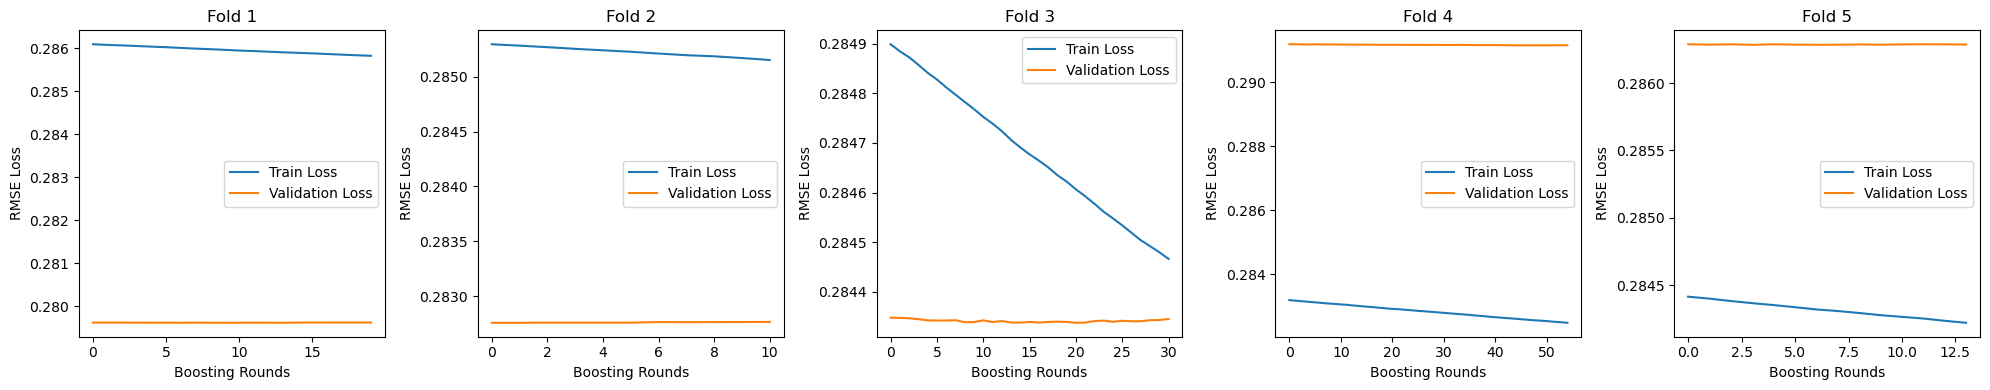

In [79]:
# 5 fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_mse_scores = []
val_mse_scores = []
eval_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_train_in, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_in, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    xgb_model.fit(
        X_train_in,
        y_train_in,
        eval_set=[(X_train_in, y_train_in), (X_val, y_val)],
        verbose=False,
    )

    evals_result = xgb_model.evals_result()
    eval_scores.append(evals_result)

    y_train_pred = xgb_model.predict(X_train_in)
    y_val_pred = xgb_model.predict(X_val)

    train_mse = mean_squared_error(y_train_in, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_mse_scores.append(train_mse)
    val_mse_scores.append(val_mse)

    print(f"Fold {fold + 1} — MSE: {train_mse:.4f}")

plot_train_val_losses(eval_scores)

print(f"Average MSE: {np.mean(train_mse_scores):.4f} ± {np.std(train_mse_scores):.4f}")

In [80]:
# Evaluate test data
xgb_model.early_stopping_rounds = None
xgb_model.fit(X_train, y_train) # Re-fit on all training data
y_test_pred = xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Final Test MSE: {test_mse:.4f}")
print(f"Final Test R²: {test_r2:.4f}")

Final Test MSE: 0.0797
Final Test R²: 0.0218


To do for XGBoost:
- hyperparameter tuning by grid search or randomized search

### Regularization strategies and hyperparameter tuning

### Production mode

### Final Results